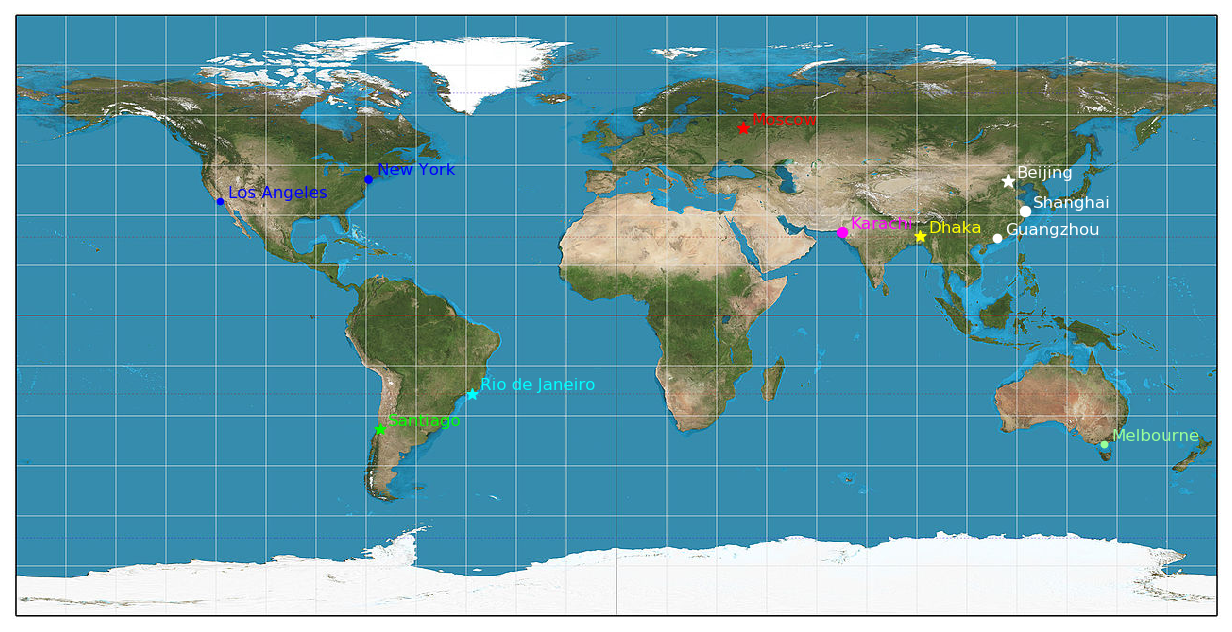

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

cities = pd.DataFrame(pd.read_csv('cities.csv', sep=','))
countrys = set(cities['Country']) # список стран из файла
# подготовка словаря - страна: мин долгота и мин широта
dcountry = defaultdict()
for country in countrys:
    # в файле перепутаны широта и долгота
    min_Longitude = np.min(cities[cities['Country'] == country]['Latitude deg'])
    min_Latitude = np.min(cities[cities['Country'] == country]['Longitude deg'])
    dcountry[country] = [min_Longitude, min_Latitude]

list_dct = list(dcountry.items())
list_dct.sort(key=lambda elem: (elem[1][0],elem[1][1]))
list_countrys = [elem[0] for elem in list_dct] # отсортированный список стран: мин долгота, мин широта
# print(list_countrys)

# список цветов, которые исключить из набора
badcolours = [str(hex(i).upper()[2:])*6 for i in range(15)] + ['9999FF'] 
# формирование списка цветов для отображения меток городов в порядке отсортированных стран
colours = []
start = 0
mc = 255
while len(colours) < len(list_countrys):
    for c in range(0,6,2):
        rc = start + c * 51
        strmc = hex(mc).upper()[2:].rjust(2, '0')
        strrc = hex(rc).upper()[2:].rjust(2, '0')
        for i in range(8):
            if c == i == 0: continue
            RGB = bin(i)[2:].rjust(3, '0')
            colour = ''.join(strmc if pos == '1' else strrc for pos in RGB)
            if colour not in colours and colour not in badcolours: colours.append(colour)
        start = 0 if start else 51
    mc -= 51

fig, ax = plt.subplots(figsize=(13,7), dpi=120)

with open('world.jpg', 'rb') as map_file:
    map_img = plt.imread(map_file)

ax.imshow(map_img)
ax.axis('off')

for idx in range(len(list_countrys)):
    country = list_countrys[idx]
    colour = colours[idx % len(colours)]        # выбор цвета для страны
    # print(country, colour)
    df = cities[cities['Country'] == country]   # датафрейм со списком городов одной страны
    for num_row in range(len(df)):              # перебор городов выбранной страны
        row = df.iloc[num_row].tolist()
        if row[6] < 1000000: continue # если население больше 1.000.000 человек
        # в файле перепутаны широта и долгота
        # Longitude - долгота
        # Latitude - широта
        longitude = row[3] + row[4]/60 + row[5]/3600    # получение долготы в дес.формате
        latitude = row[0] + row[1]/60 + row[2]/3600     # получение широты в дес.формате
        # пересчет долготы и широты в координаты карты исходя из её размеров в пикселях
        x = map_img.shape[1] / 2 + longitude * map_img.shape[1] / 360
        y = map_img.shape[0] / 2 - latitude * map_img.shape[0] / 180
        if row[8]:          # столица
            marker = '*'
            size = 40
        else:               # обычный город
            marker =  'o'
            size = 10
        size += row[6]//1000000     # размер маркера в зависимости от численности города
        ax.scatter(x=x, y=y, marker=marker, s = size, c='#'+colour)
        ax.text(x+map_img.shape[1]/150, y-map_img.shape[0]/170, row[9], fontsize = 10, c='#'+colour)
plt.savefig('world.svg')
plt.show()